# Clustering Analysis

**Data Preprocessing:**

In [17]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [18]:
excel_file = 'EastWestAirlines.xlsx'
sheet_names = pd.ExcelFile(excel_file).sheet_names
print("Sheets in the file:", sheet_names)

Sheets in the file: ['Description', 'data']


In [19]:
# Load the "Data" sheet
df= pd.read_excel(excel_file, sheet_name="data")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [20]:
print(df.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [22]:
print(df.describe())

               ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      

In [23]:
print(df.shape)

(3999, 12)


In [24]:
#Handle missing values
print(df.isnull().sum())

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [25]:
#Remove outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_no_outliers)
print(IQR)

       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
5        6    16420           0          1          1          1            0   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_m

In [28]:
#Scale the festures
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
print(scaled_data)

[[-1.73512503e+00 -4.51140783e-01 -1.86298687e-01 ... -3.62167870e-01
   1.39545434e+00 -7.66919299e-01]
 [-1.73426342e+00 -5.39456874e-01 -1.86298687e-01 ... -3.62167870e-01
   1.37995704e+00 -7.66919299e-01]
 [-1.73340181e+00 -3.20031232e-01 -1.86298687e-01 ... -3.62167870e-01
   1.41192021e+00 -7.66919299e-01]
 ...
 [ 1.72682006e+00 -4.29480975e-05 -1.86298687e-01 ... -3.62167870e-01
  -1.31560393e+00  1.30391816e+00]
 [ 1.72768167e+00 -1.85606976e-01 -1.86298687e-01 ... -9.85033311e-02
  -1.31608822e+00 -7.66919299e-01]
 [ 1.72854328e+00 -7.00507951e-01 -1.86298687e-01 ... -3.62167870e-01
  -1.31754109e+00 -7.66919299e-01]]


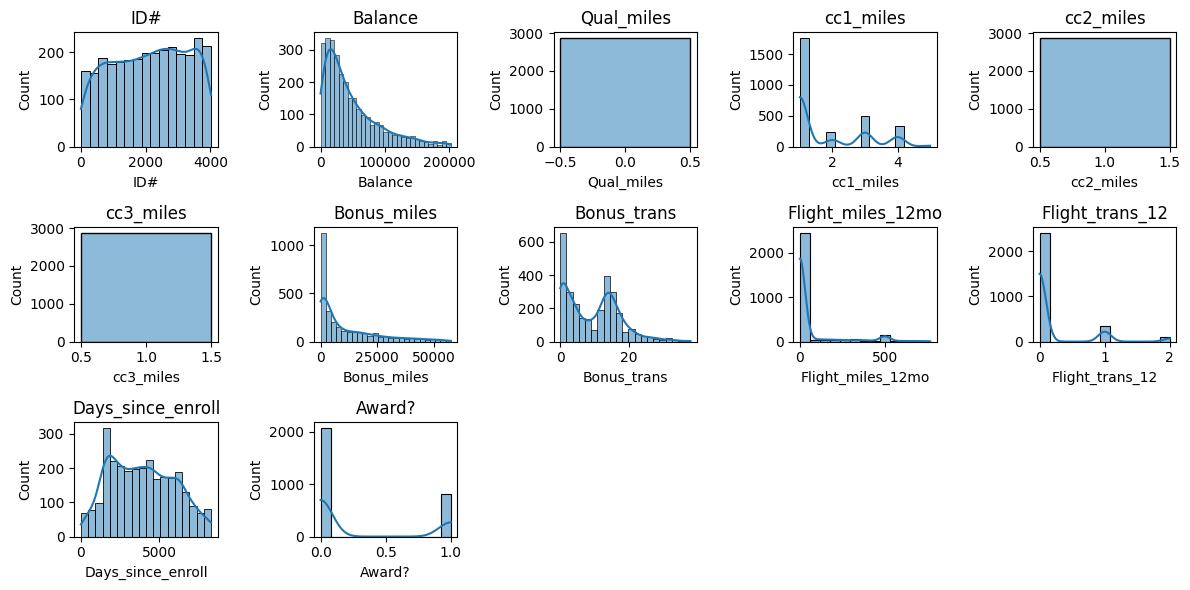

In [29]:
# Visualize data distribution
plt.figure(figsize=(12, 6))
for column in df_no_outliers.columns:
    plt.subplot(3, 5, list(df_no_outliers.columns).index(column) + 1)
    sns.histplot(df_no_outliers[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

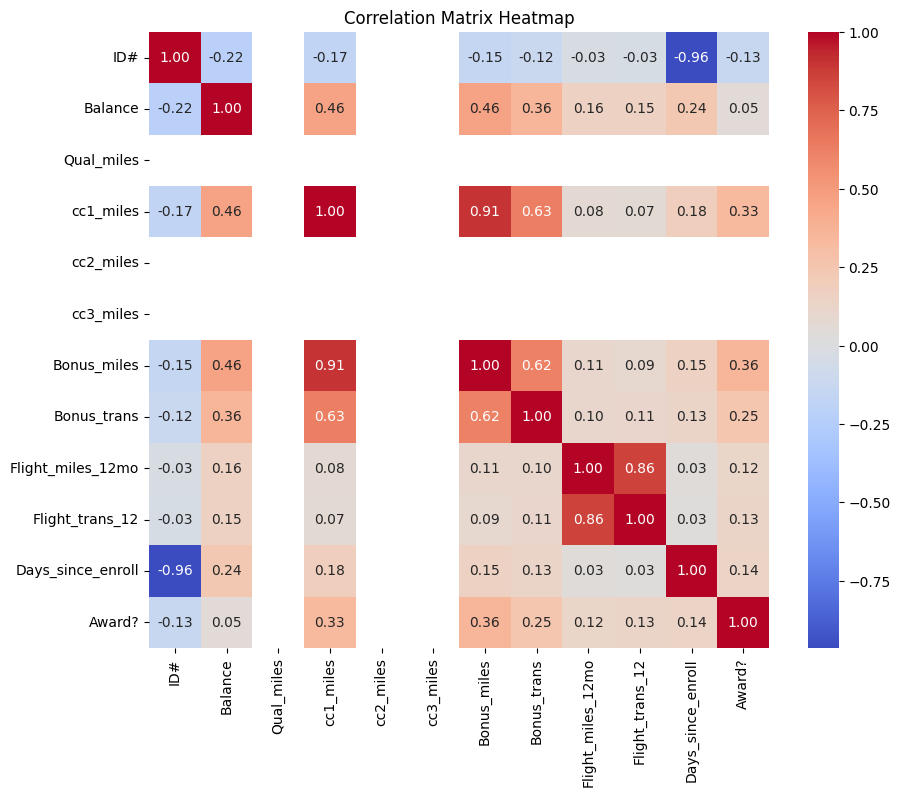

In [30]:
# Create a correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df_no_outliers.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

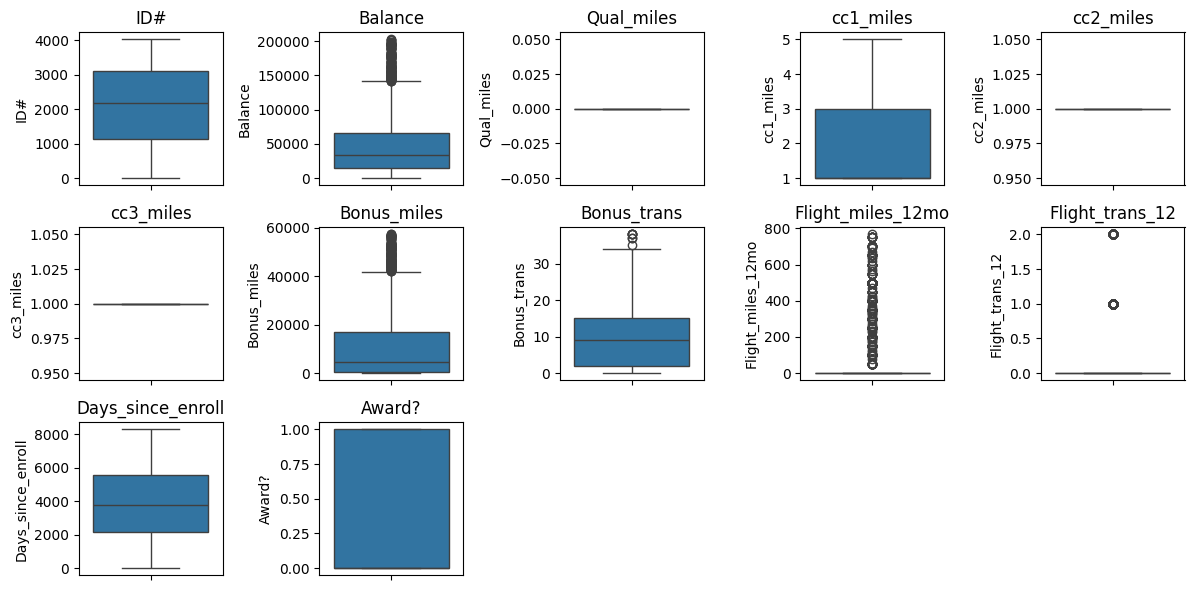

In [31]:
# Box plots to visualize data distribution and identify outliers
plt.figure(figsize=(12, 6))
for i, column in enumerate(df_no_outliers.columns):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(y=df_no_outliers[column])
    plt.title(column)
plt.tight_layout()
plt.show()

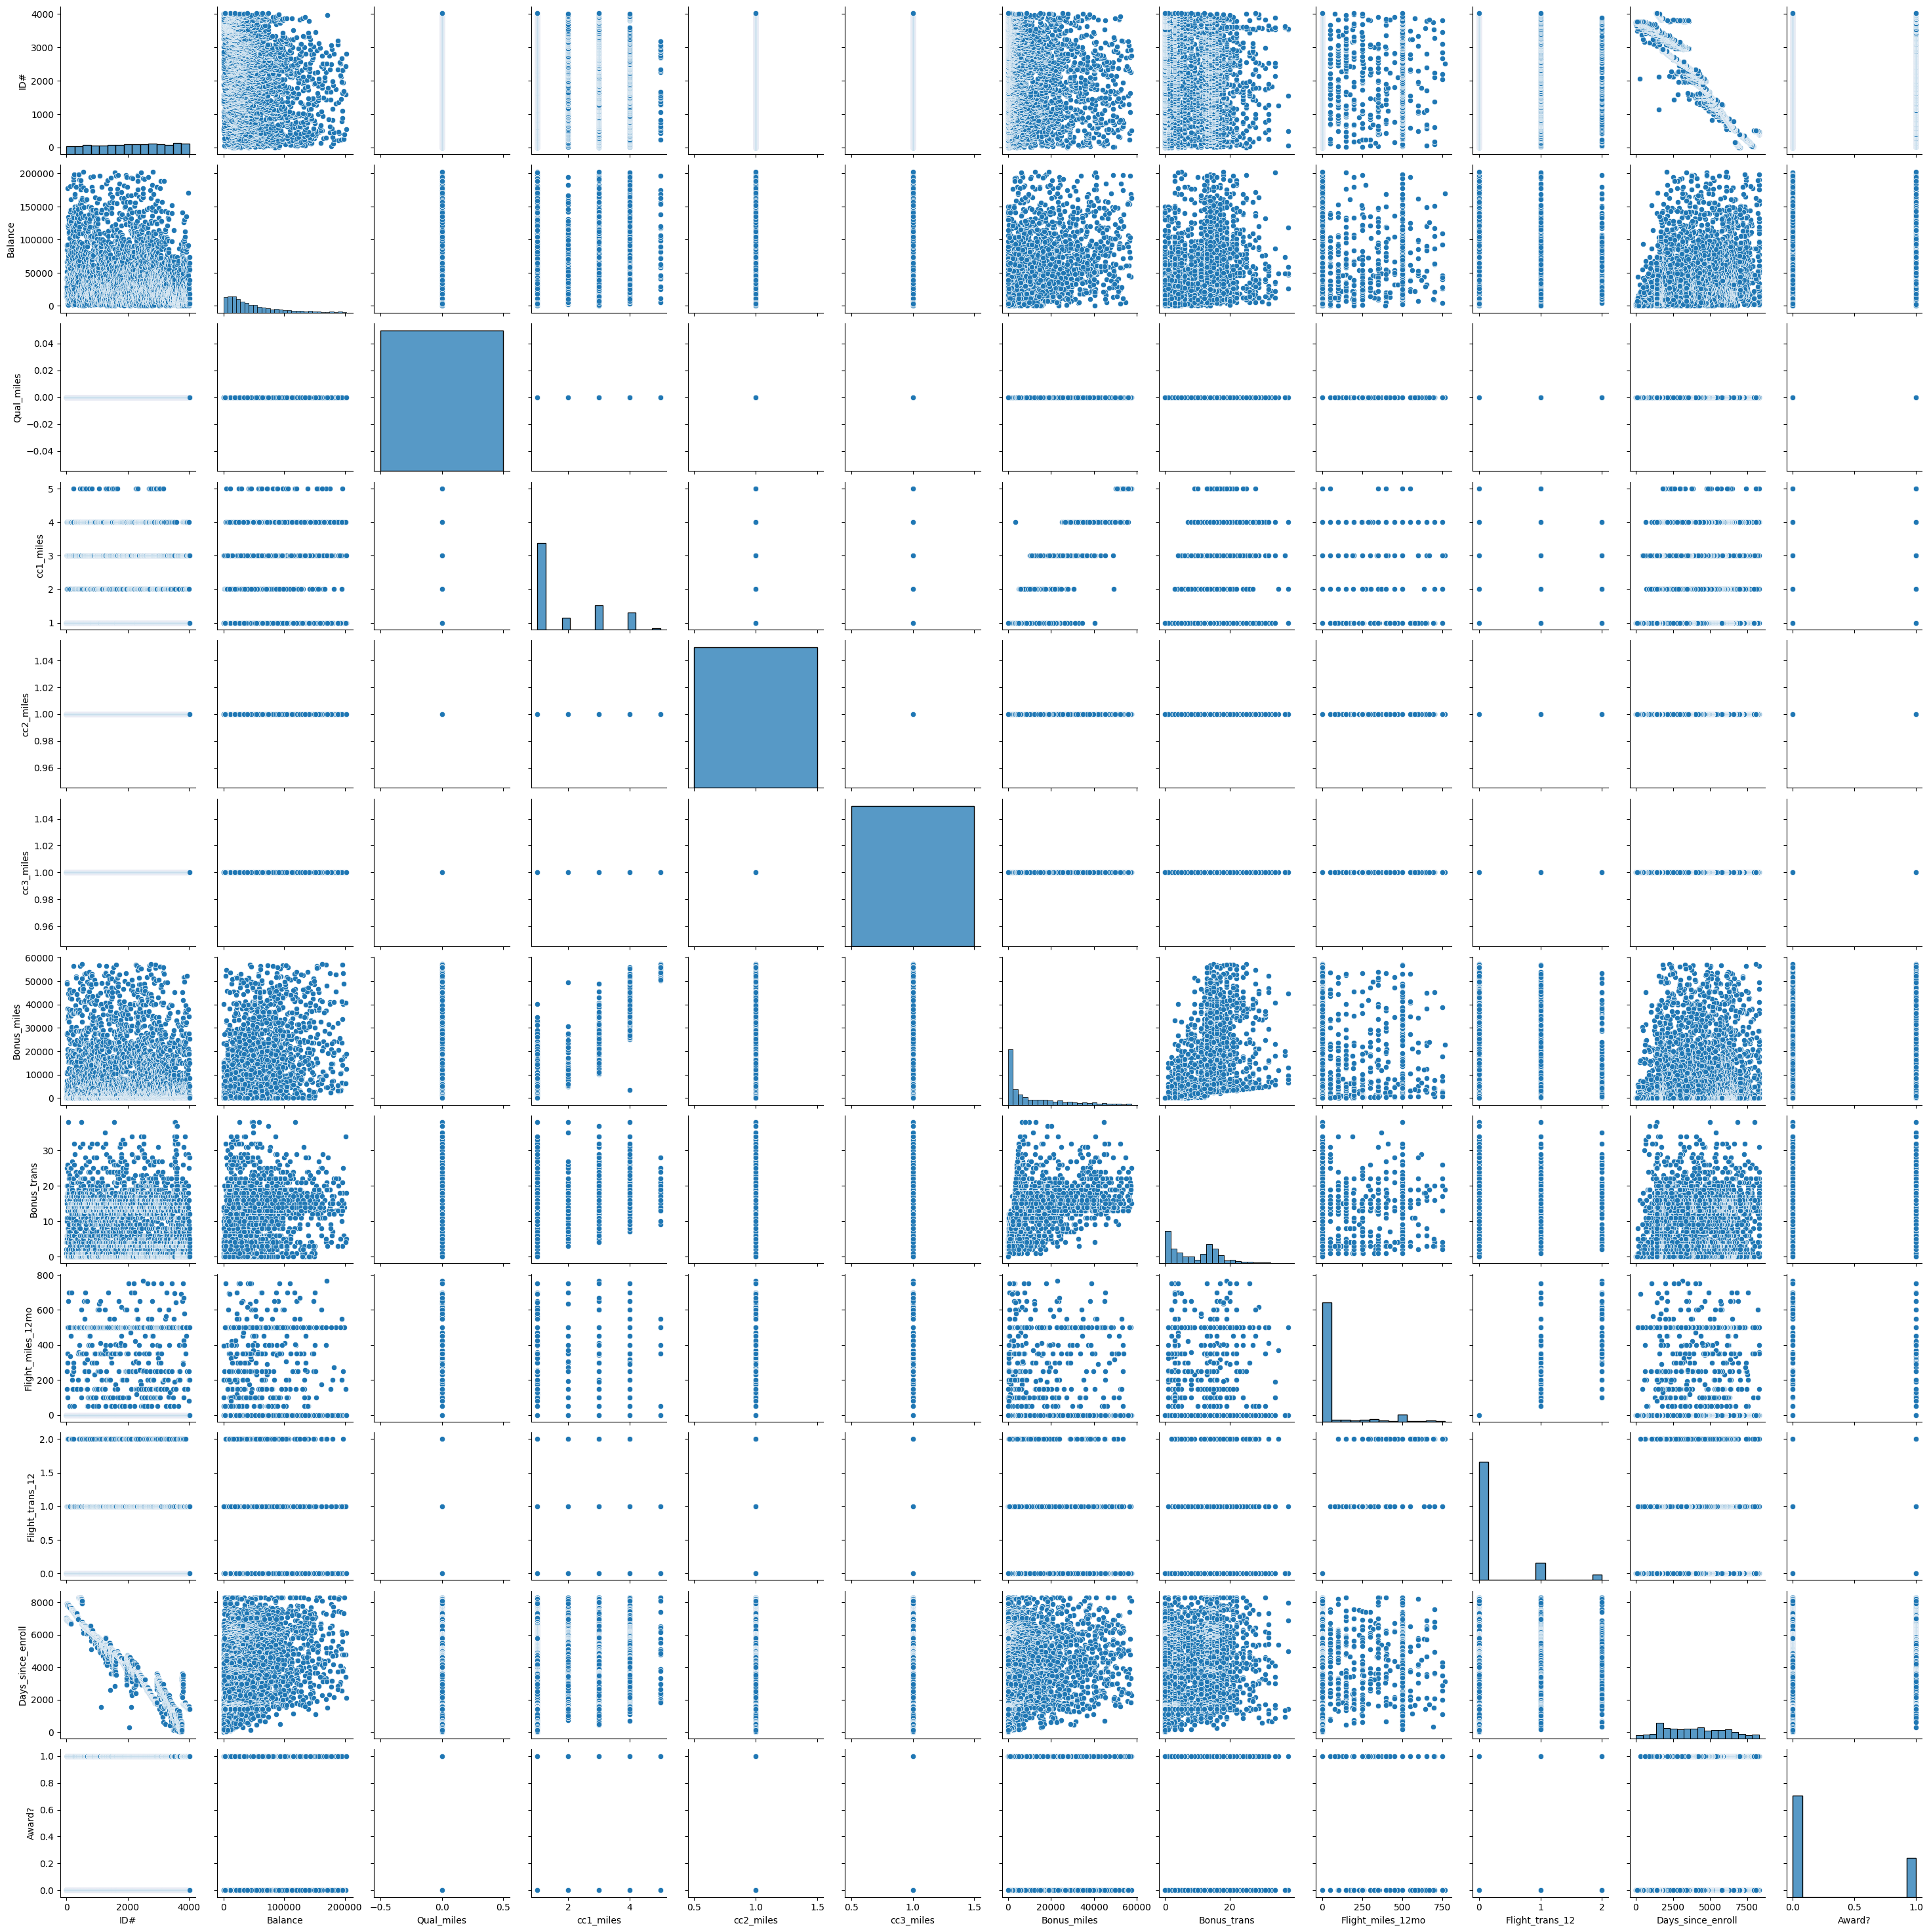

In [32]:
#Scatter plot matrix
sns.pairplot(df_no_outliers)
plt.show()

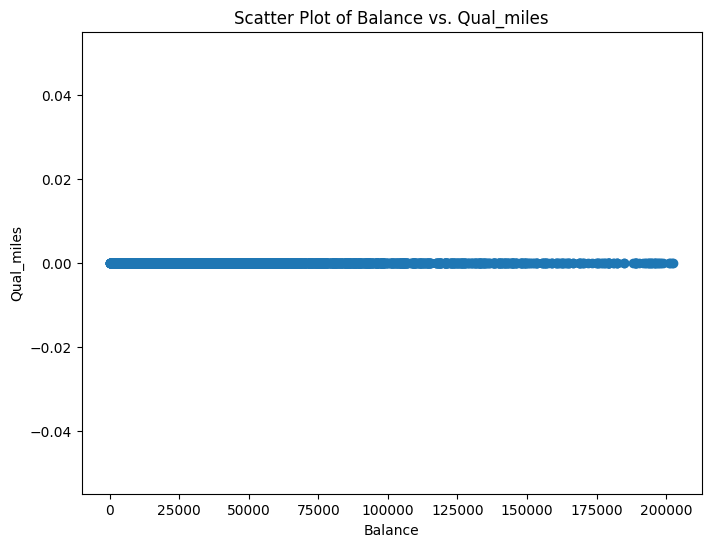

In [33]:
#Potential Clusters using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_no_outliers['Balance'], df_no_outliers['Qual_miles'])  # Example features, replace with relevant ones
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.title('Scatter Plot of Balance vs. Qual_miles')
plt.show()

**Implementing Clustering Algorithms:**

In [7]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [8]:
# Generate synthetic dataset for clustering
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

In [9]:
# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

Text(0.5, 1.0, 'K-Means Clustering')

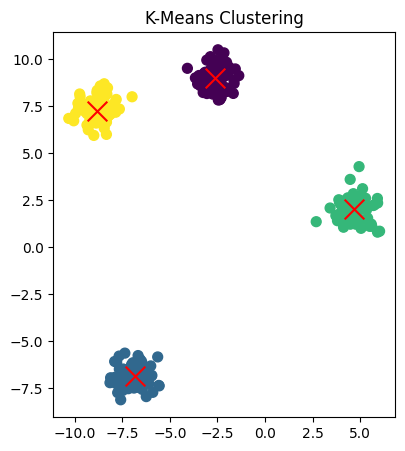

In [10]:
# Plot K-Means results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200)
plt.title("K-Means Clustering")

In [11]:
# Hierarchical Clustering
linkage_matrix = linkage(X, method='ward')

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

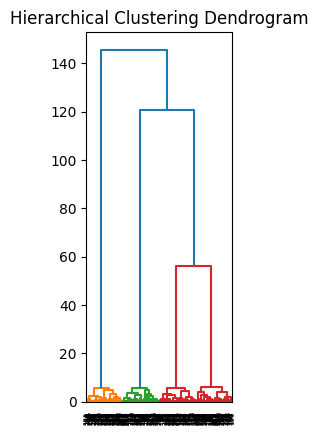

In [12]:
# Dendrogram visualization
plt.subplot(1, 3, 2)
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")

In [13]:
# Cut the dendrogram to form flat clusters
hierarchical_labels = fcluster(linkage_matrix, t=4, criterion='maxclust')

Text(0.5, 1.0, 'Hierarchical Clustering')

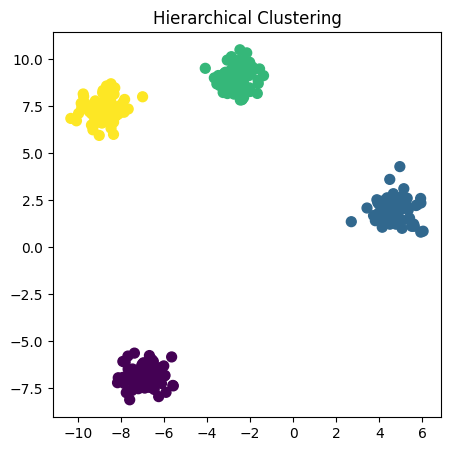

In [14]:
# Plot hierarchical clustering results
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=hierarchical_labels, cmap='viridis', s=50)
plt.title("Hierarchical Clustering")

In [15]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

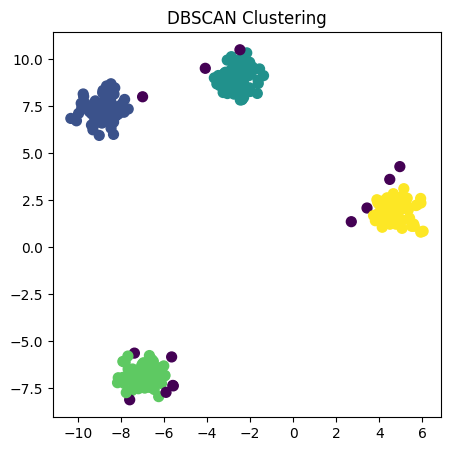

In [16]:
# Plot DBSCAN results
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering")

plt.show()

In [21]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [23]:
# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: Dimensionality Reduction
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

In [24]:
# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [25]:
# Apply GMM
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

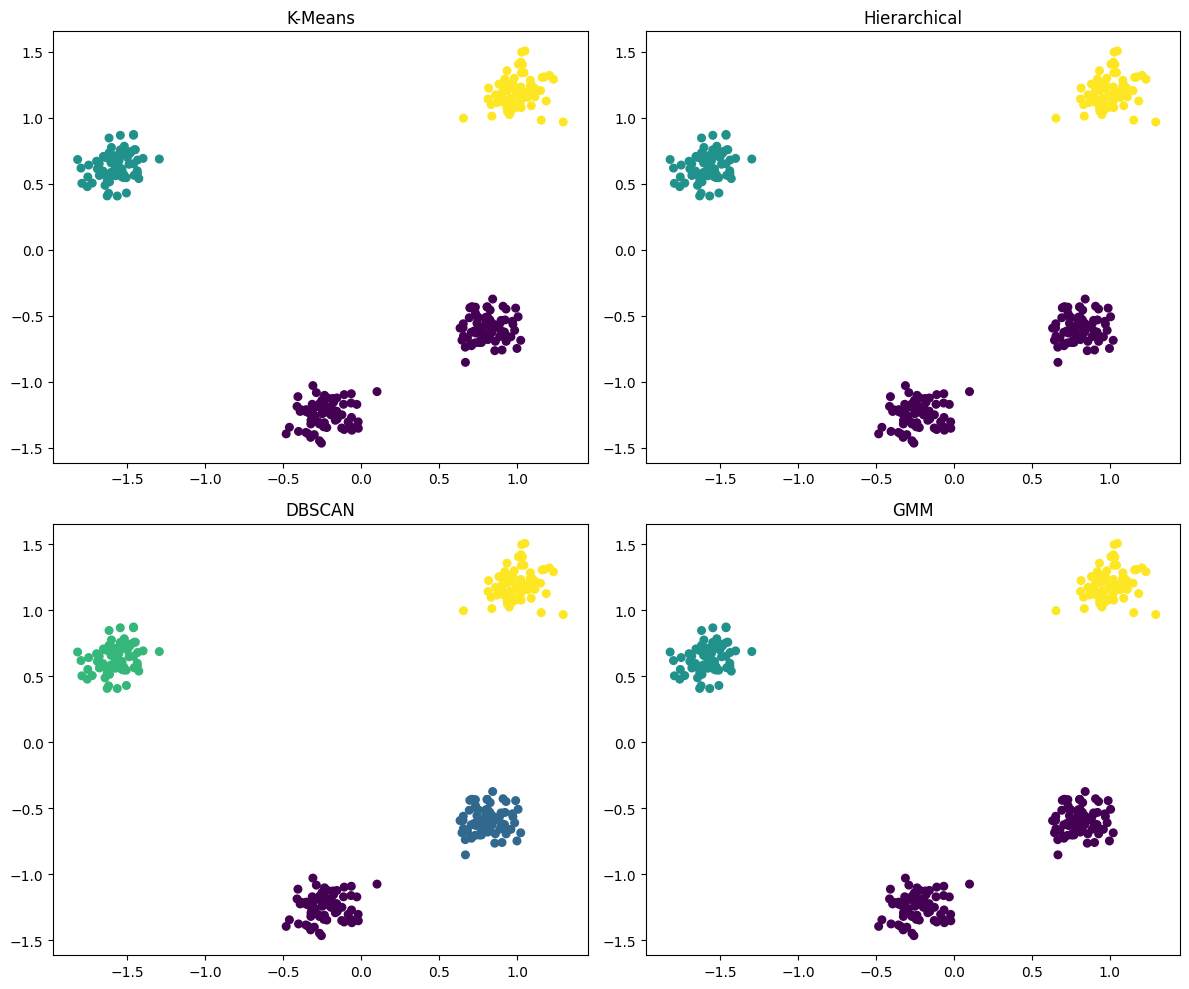

In [26]:
# Visualize results (using PCA-reduced data)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
algorithms = [("K-Means", kmeans_labels),
              ("Hierarchical", hierarchical_labels),
              ("DBSCAN", dbscan_labels),
              ("GMM", gmm_labels)]

for ax, (name, labels) in zip(axes.flatten(), algorithms):
    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", s=30)
    ax.set_title(name)
plt.tight_layout()
plt.show()

In [27]:
# Evaluate Clustering Performance (e.g., Silhouette Score)
for name, labels in algorithms:
    if len(set(labels)) > 1:  # Silhouette score needs >1 cluster
        score = silhouette_score(X_scaled, labels)
        print(f"{name} Silhouette Score: {score:.2f}")

K-Means Silhouette Score: 0.78
Hierarchical Silhouette Score: 0.78
DBSCAN Silhouette Score: 0.88
GMM Silhouette Score: 0.78


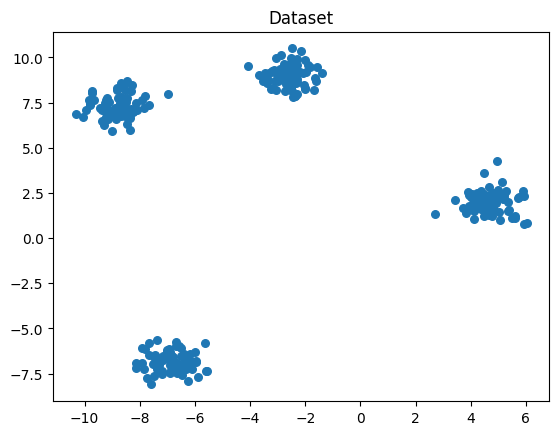

In [29]:
# Generate synthetic dataset
data, labels_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Plot dataset
def plot_data():
    plt.scatter(data[:, 0], data[:, 1], s=30)
    plt.title("Dataset")
    plt.show()

plot_data()

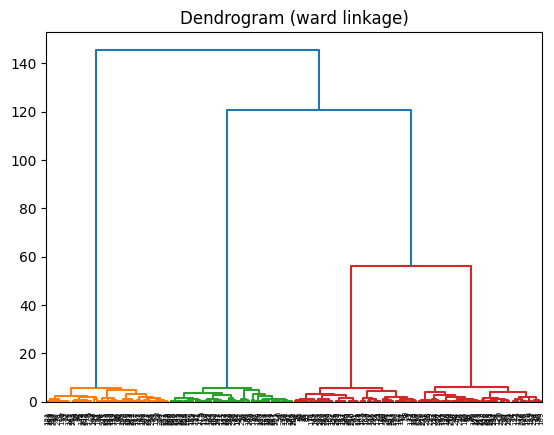

Silhouette Score for ward linkage: 0.88


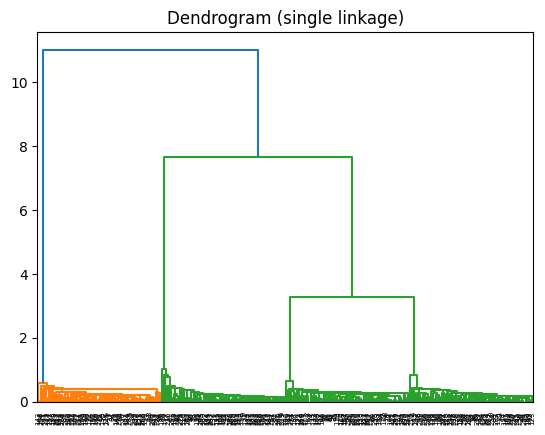

Silhouette Score for single linkage: 0.88


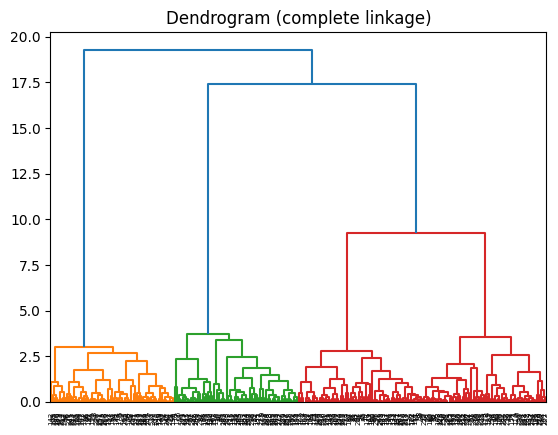

Silhouette Score for complete linkage: 0.88


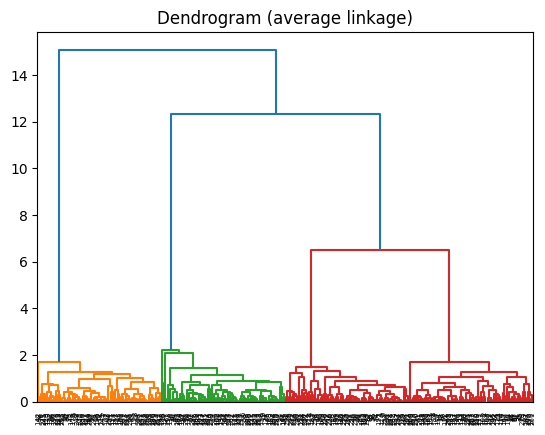

Silhouette Score for average linkage: 0.88


In [30]:
# 1. Hierarchical Clustering
linkage_methods = ['ward', 'single', 'complete', 'average']
for method in linkage_methods:
    Z = linkage(data, method=method)
    plt.figure()
    plt.title(f"Dendrogram ({method} linkage)")
    dendrogram(Z)
    plt.show()

    # Extract clusters
    clusters = fcluster(Z, t=4, criterion='maxclust')
    silhouette = silhouette_score(data, clusters)
    print(f"Silhouette Score for {method} linkage: {silhouette:.2f}")

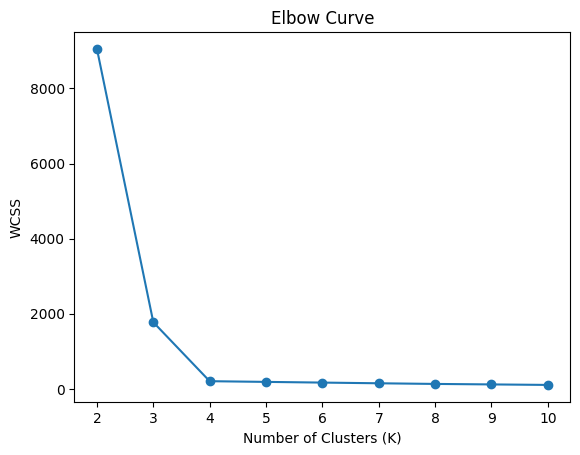

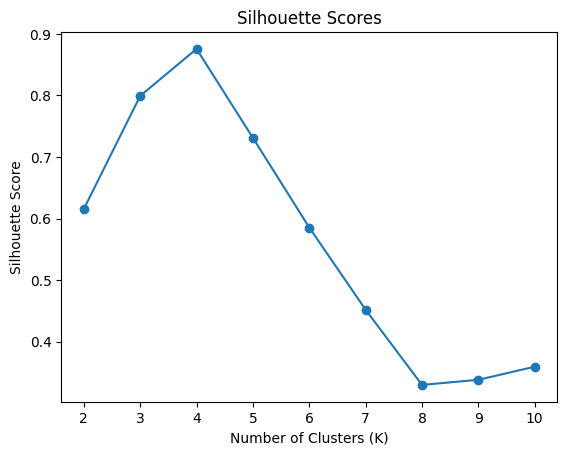

Best K based on Silhouette Score: 4


In [33]:
# 2. K-Means Clustering
wcss = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))

# Elbow Curve
plt.figure()
plt.plot(K_range, wcss, marker='o')
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()

# Silhouette Scores
plt.figure()
plt.plot(K_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

# Best K
best_k = K_range[np.argmax(silhouette_scores)]
print(f"Best K based on Silhouette Score: {best_k}")

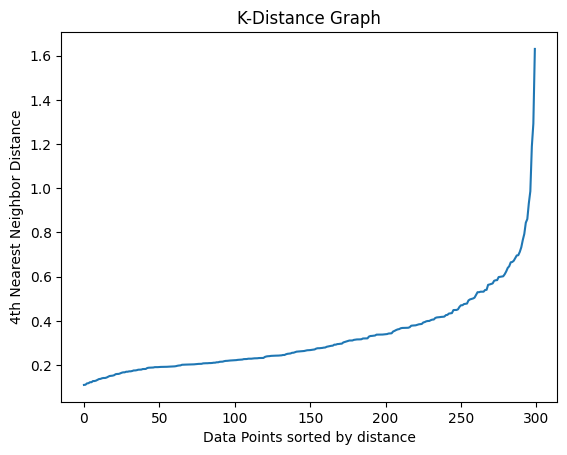

In [34]:
# 3. DBSCAN Clustering
from sklearn.neighbors import NearestNeighbors

# K-distance graph to estimate epsilon
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)

distances = np.sort(distances[:, 4], axis=0)
plt.figure()
plt.plot(distances)
plt.title("K-Distance Graph")
plt.xlabel("Data Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.show()

DBSCAN (eps=0.3, minPts=5): Silhouette Score = 0.34


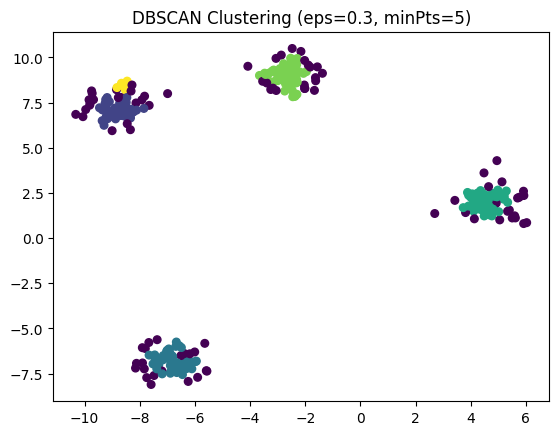

DBSCAN (eps=0.3, minPts=10): Silhouette Score = -0.20


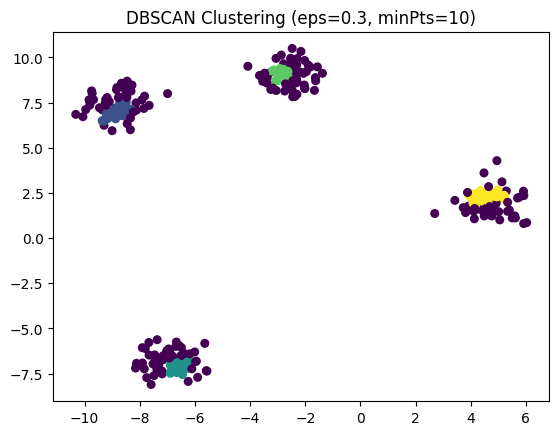

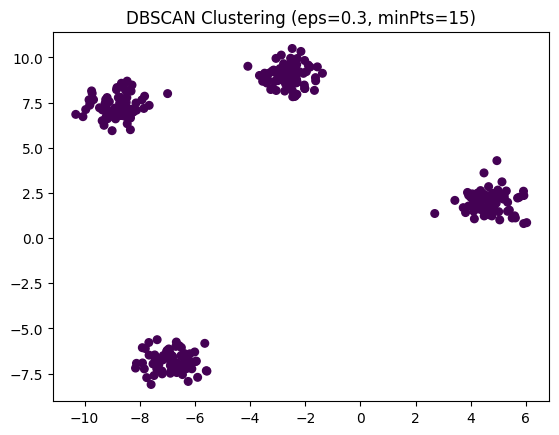

DBSCAN (eps=0.5, minPts=5): Silhouette Score = 0.80


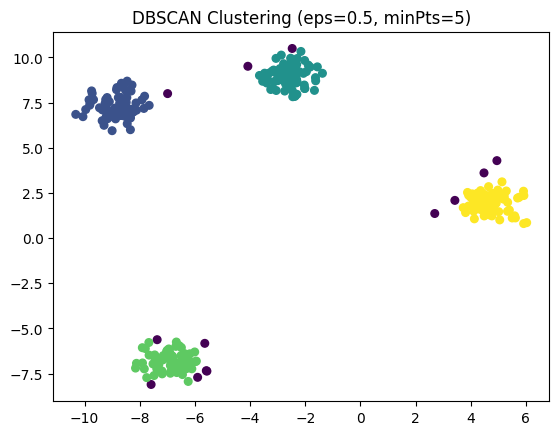

DBSCAN (eps=0.5, minPts=10): Silhouette Score = 0.67


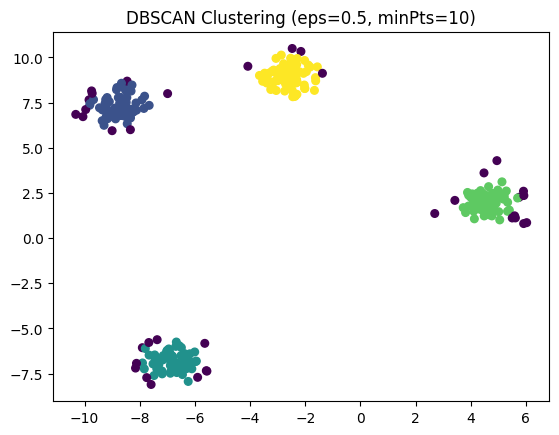

DBSCAN (eps=0.5, minPts=15): Silhouette Score = 0.49


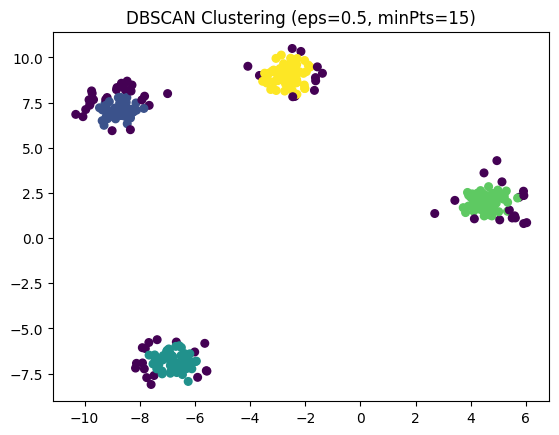

DBSCAN (eps=0.7, minPts=5): Silhouette Score = 0.83


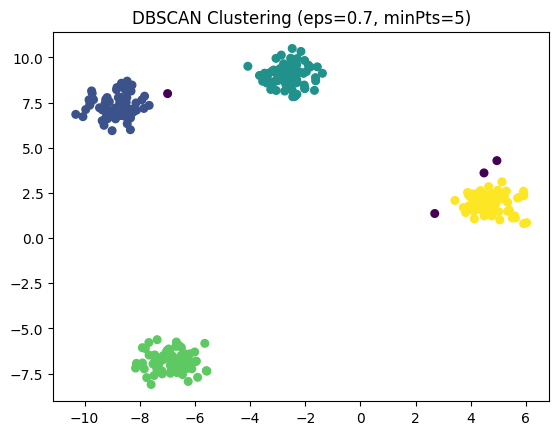

DBSCAN (eps=0.7, minPts=10): Silhouette Score = 0.83


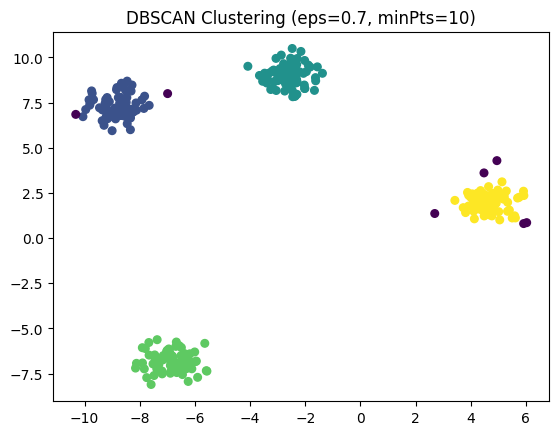

DBSCAN (eps=0.7, minPts=15): Silhouette Score = 0.81


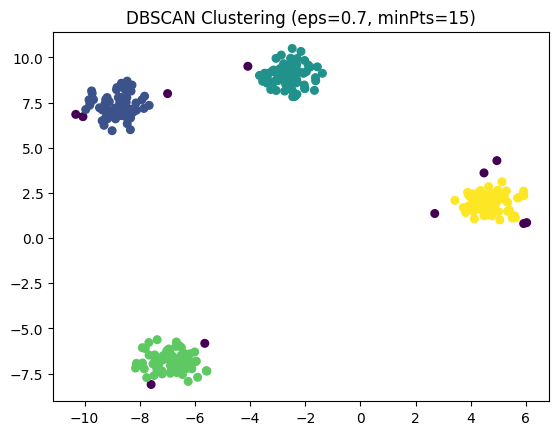

In [35]:
# DBSCAN with different parameters
eps_values = [0.3, 0.5, 0.7]
min_samples = [5, 10, 15]

for eps in eps_values:
    for min_pts in min_samples:
        dbscan = DBSCAN(eps=eps, min_samples=min_pts).fit(data)
        labels = dbscan.labels_

        # Ignore cases with single cluster
        if len(set(labels)) > 1:
            silhouette = silhouette_score(data, labels)
            print(f"DBSCAN (eps={eps}, minPts={min_pts}): Silhouette Score = {silhouette:.2f}")

        # Plot results
        plt.figure()
        plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=30)
        plt.title(f"DBSCAN Clustering (eps={eps}, minPts={min_pts})")
        plt.show()

**Cluster Analysis and Interpretation:**

In [37]:
# Apply PCA for visualization purposes
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data_pca = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])

In [38]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
data['KMeans_Cluster'] = kmeans_labels

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)
data['DBSCAN_Cluster'] = dbscan_labels

In [39]:
# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(data_scaled)
data['Agglomerative_Cluster'] = agglo_labels

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(data_scaled)
data['GMM_Cluster'] = gmm_labels

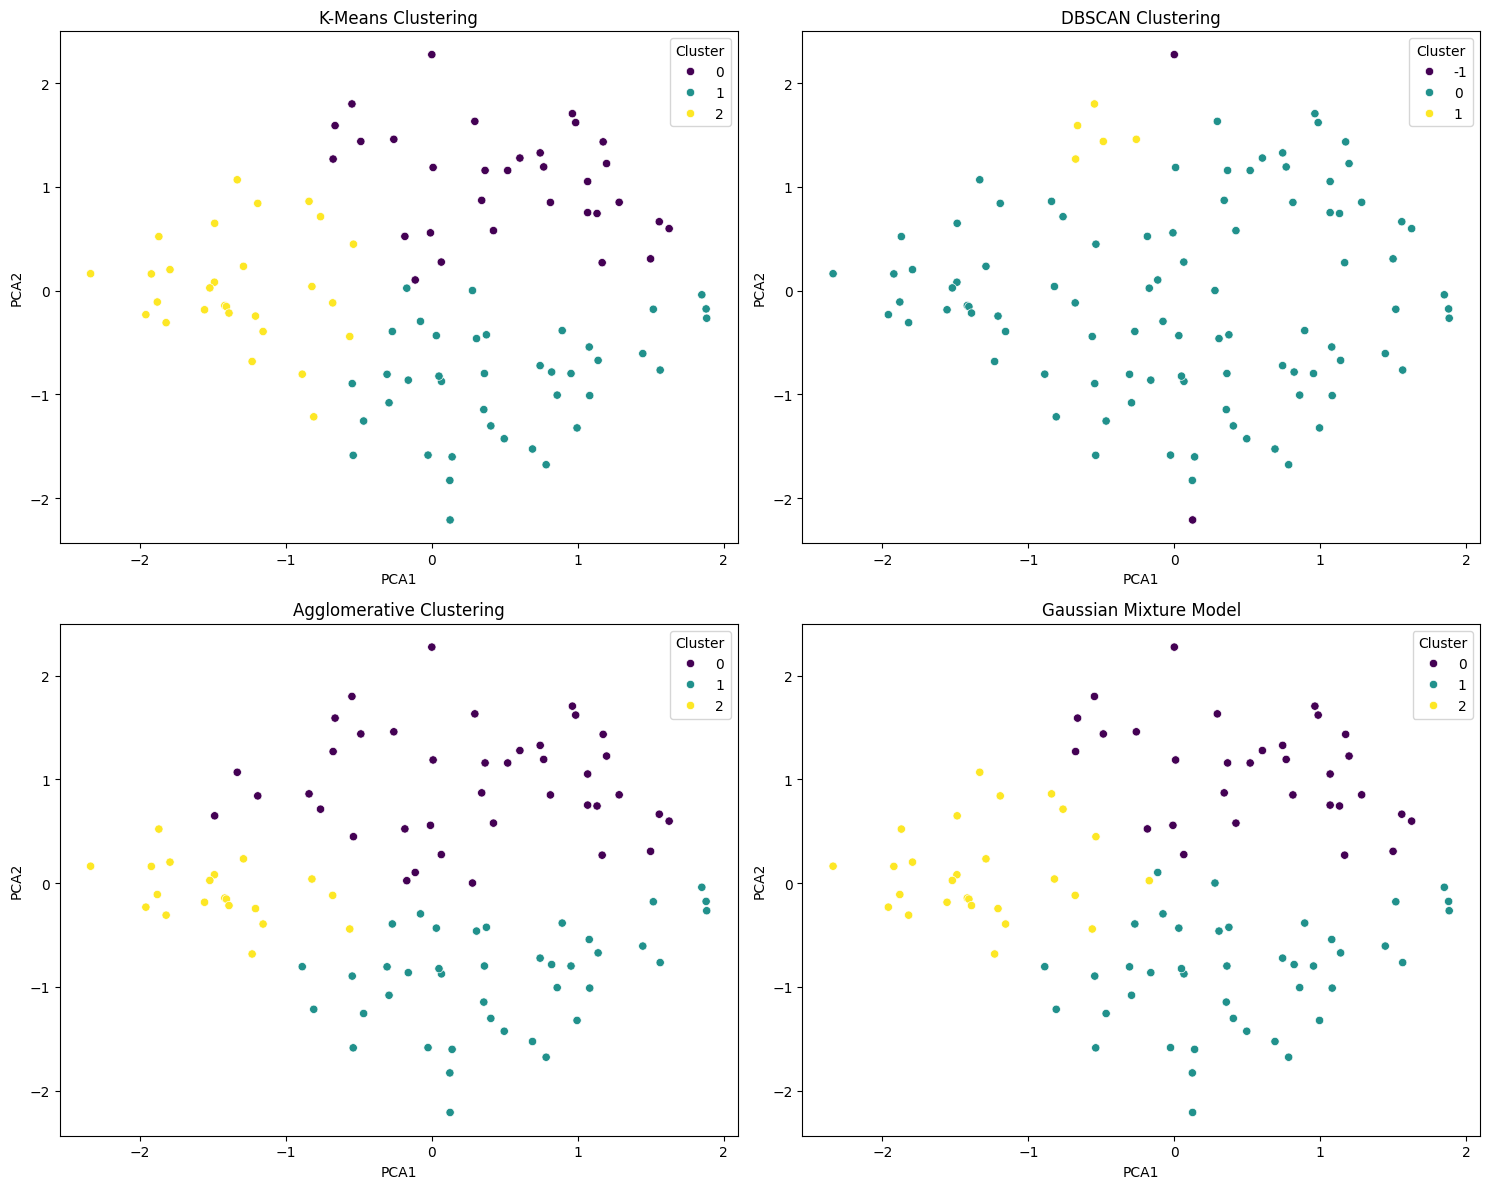

In [40]:
# Visualize clusters for each algorithm
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
algorithms = ["KMeans_Cluster", "DBSCAN_Cluster", "Agglomerative_Cluster", "GMM_Cluster"]
titles = ["K-Means Clustering", "DBSCAN Clustering", "Agglomerative Clustering", "Gaussian Mixture Model"]

for ax, algo, title in zip(axes.flatten(), algorithms, titles):
    sns.scatterplot(
        x='PCA1', y='PCA2', hue=algo, data=data_pca.join(data[algo]), palette='viridis', ax=ax
    )
    ax.set_title(title)
    ax.legend(title="Cluster")

plt.tight_layout()
plt.show()

In [41]:
# Analyze clusters
for algo in algorithms:
    print(f"\n--- Analysis for {algo} ---")
    for cluster in data[algo].unique():
        cluster_data = data[data[algo] == cluster]
        print(f"Cluster {cluster}:\n", cluster_data.describe())


--- Analysis for KMeans_Cluster ---
Cluster 1:
         Feature1   Feature2  KMeans_Cluster  DBSCAN_Cluster  \
count  40.000000  40.000000            40.0       40.000000   
mean    3.911371   7.831848             1.0       -0.025000   
std     2.012239   1.439013             0.0        0.158114   
min     0.376344   4.700415             1.0       -1.000000   
25%     2.712836   6.664079             1.0        0.000000   
50%     3.842411   8.246109             1.0        0.000000   
75%     4.986985   8.941270             1.0        0.000000   
max     8.225458   9.998700             1.0        0.000000   

       Agglomerative_Cluster  GMM_Cluster  
count              40.000000    40.000000  
mean                0.950000     1.025000  
std                 0.220721     0.158114  
min                 0.000000     1.000000  
25%                 1.000000     1.000000  
50%                 1.000000     1.000000  
75%                 1.000000     1.000000  
max                 1.000000   

**Visualization:**

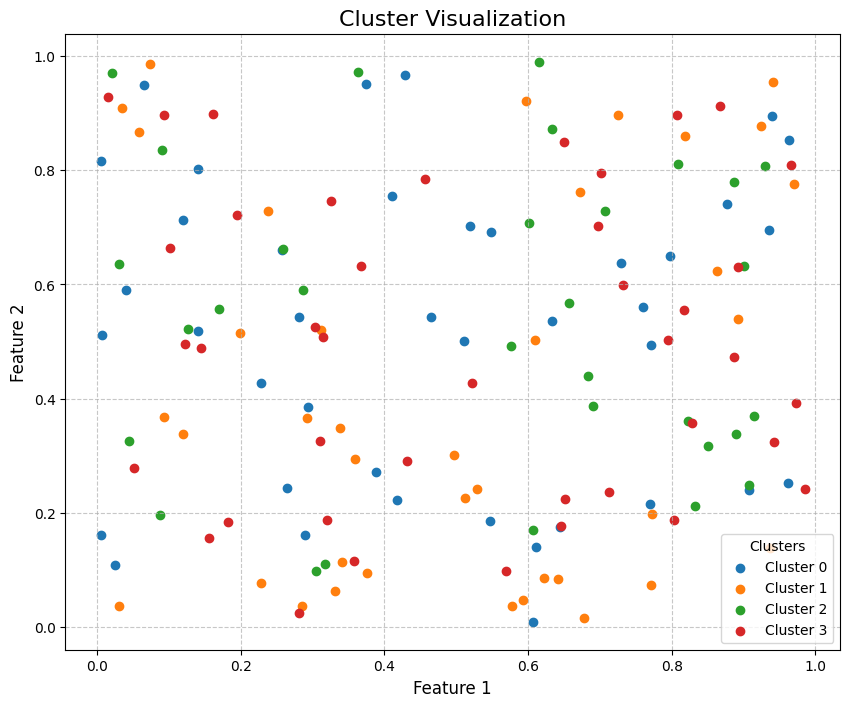

In [45]:
# Generate sample data for demonstration
np.random.seed(42)
data = np.random.rand(150, 2)  # 150 data points with 2 features
cluster_labels = np.random.randint(0, 4, size=150)  # Randomly assign to 4 clusters

# Plot the clusters
plt.figure(figsize=(10, 8))
for cluster in np.unique(cluster_labels):
    cluster_data = data[cluster_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster}")

# Add labels, title, and legend
plt.title("Cluster Visualization", fontsize=16)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.legend(title="Clusters", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Evaluation and Performance Metrics:**

In [48]:
# Generate sample data
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Perform DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(X)

# Calculate the Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(X, kmeans_labels)
print(f'Silhouette Score for K-Means: {silhouette_kmeans:.4f}')

Silhouette Score for K-Means: 0.7911


In [49]:
# Calculate the Silhouette Score for DBSCAN
# For DBSCAN, we ignore noise points (-1 labels) for silhouette score calculation
if len(set(dbscan_labels)) > 1:  # Only calculate if DBSCAN finds more than 1 cluster
    silhouette_dbscan = silhouette_score(X, dbscan_labels)
    print(f'Silhouette Score for DBSCAN: {silhouette_dbscan:.4f}')
else:
    print('DBSCAN did not find any clusters.')

# Visualize the clusters and their respective silhouette scores

Silhouette Score for DBSCAN: -0.5678


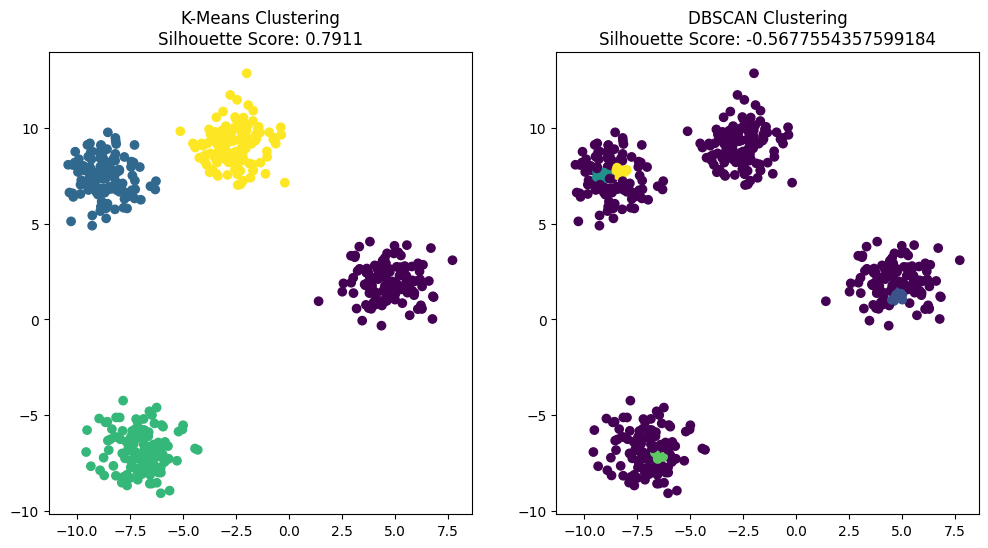

In [50]:
# Plot K-Means clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.title(f'K-Means Clustering\nSilhouette Score: {silhouette_kmeans:.4f}')

# Plot DBSCAN clusters
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', marker='o')
plt.title(f'DBSCAN Clustering\nSilhouette Score: {silhouette_dbscan if len(set(dbscan_labels)) > 1 else "No clusters"}')

plt.show()